<a href="https://colab.research.google.com/github/sowmya2k4/CODSOFT/blob/main/codsoftTitanicdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Titanic dataset to build  that predicts whether a passenger  on the Titanic survived or not



In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

READING FILE DATA INTO COLLAB AND DISPLAYING FIRST 10 ROWS IN THE DATAFRAME


In [ ]:
data = pd.read_csv("/content/titanicdata.csv")
data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


DISPLAYING THE LAST 10 ROWS OF THE DATAFRAME

In [ ]:
data.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
408,1300,1,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,NaN,Q
409,1301,1,3,"Peacock, Miss. Treasteall",female,3.0,1,1,SOTON/O.Q. 3101315,13.7750,NaN,S
410,1302,1,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,NaN,Q
411,1303,1,1,"Minahan, Mrs. William Edward (Lillian E Thorpe)",female,37.0,1,0,19928,90.0000,C78,Q
412,1304,1,3,"Henriksson, Miss. Jenny Lovisa",female,28.0,0,0,347086,7.7750,NaN,S
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


DISPLAYING THE NUMBER OF ROWS AND COLUMNS IN THE DATAFRAME

In [ ]:
data.shape

(418, 12)

DISPLAYING THE TOTAL INFORMATION ABOUT THE DATAFRAME

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


DISPLAYING THE COUNT,MEAN,STANDARD DEVIVATION(STD),MIN,MAX AND OTHER VALUES OF THE DATA FRAME

In [ ]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


CHECKING FOR DUPLICATED DATA ON THE DATAFRAME . DUPLICATE VALUES  IN A DATA FRAME  AFFECT THE DATA ANALYSIS AND THUS DECREASES ACCURACY OF THE PREDICTION .

In [ ]:
data.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Length: 418, dtype: bool

DATA PREROCESSING AND VISUALIZATION

DROPPING COLUMNS AS THESE ARE UNRELAVENT TO OUR ANLAYSIS .DROPPING UNWANTED COLUMNS HELPS US IN PERFORMING THE ANALYSIS EASIER.

In [ ]:
data.drop(['PassengerId','Name','SibSp','Parch','Ticket','Cabin','Embarked'] , axis = 'columns' , inplace = True)
data.head(10)

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,34.5,7.8292
1,1,3,female,47.0,7.0000
2,0,2,male,62.0,9.6875
3,0,3,male,27.0,8.6625
4,1,3,female,22.0,12.2875
5,0,3,male,14.0,9.2250
6,1,3,female,30.0,7.6292
7,0,2,male,26.0,29.0000
8,1,3,female,18.0,7.2292
9,0,3,male,21.0,24.1500


VISUAL UNDERSTANDING OF DATA USING BOX PLOT

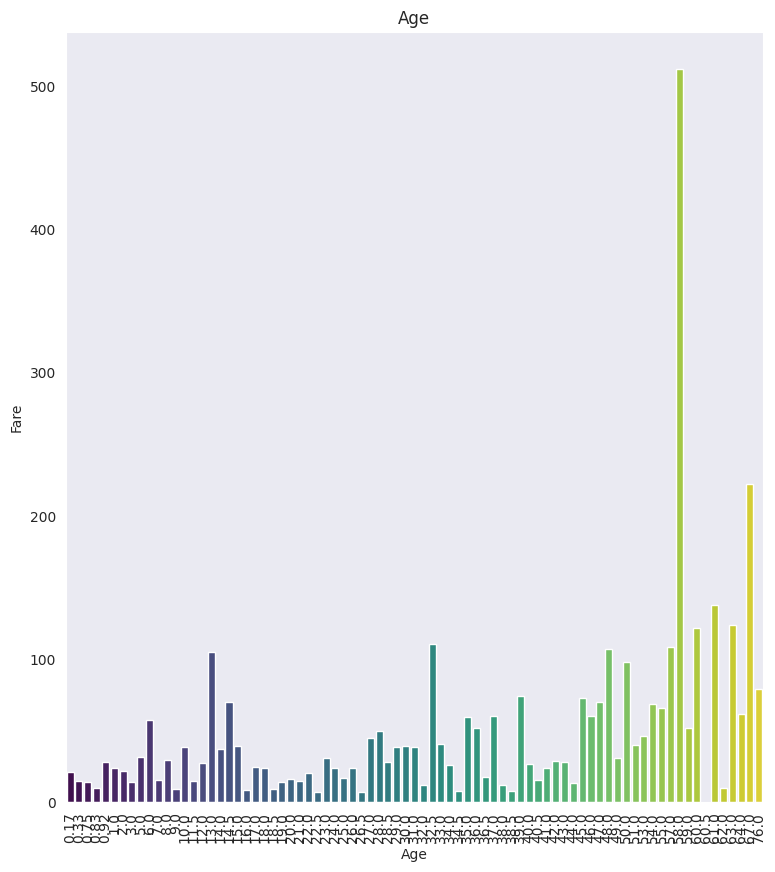

In [ ]:
#grouping the 'Age' and 'Fare" columns .
grouped_data = data.groupby('Age')['Fare'].mean().reset_index()
# Create a bar plot
plt.figure(figsize=(9, 10))
sns.barplot(x='Age', y='Fare', data=grouped_data, palette='viridis')
plt.title('Age')
plt.ylabel('Fare')
plt.xticks(rotation = 90)
plt.show()

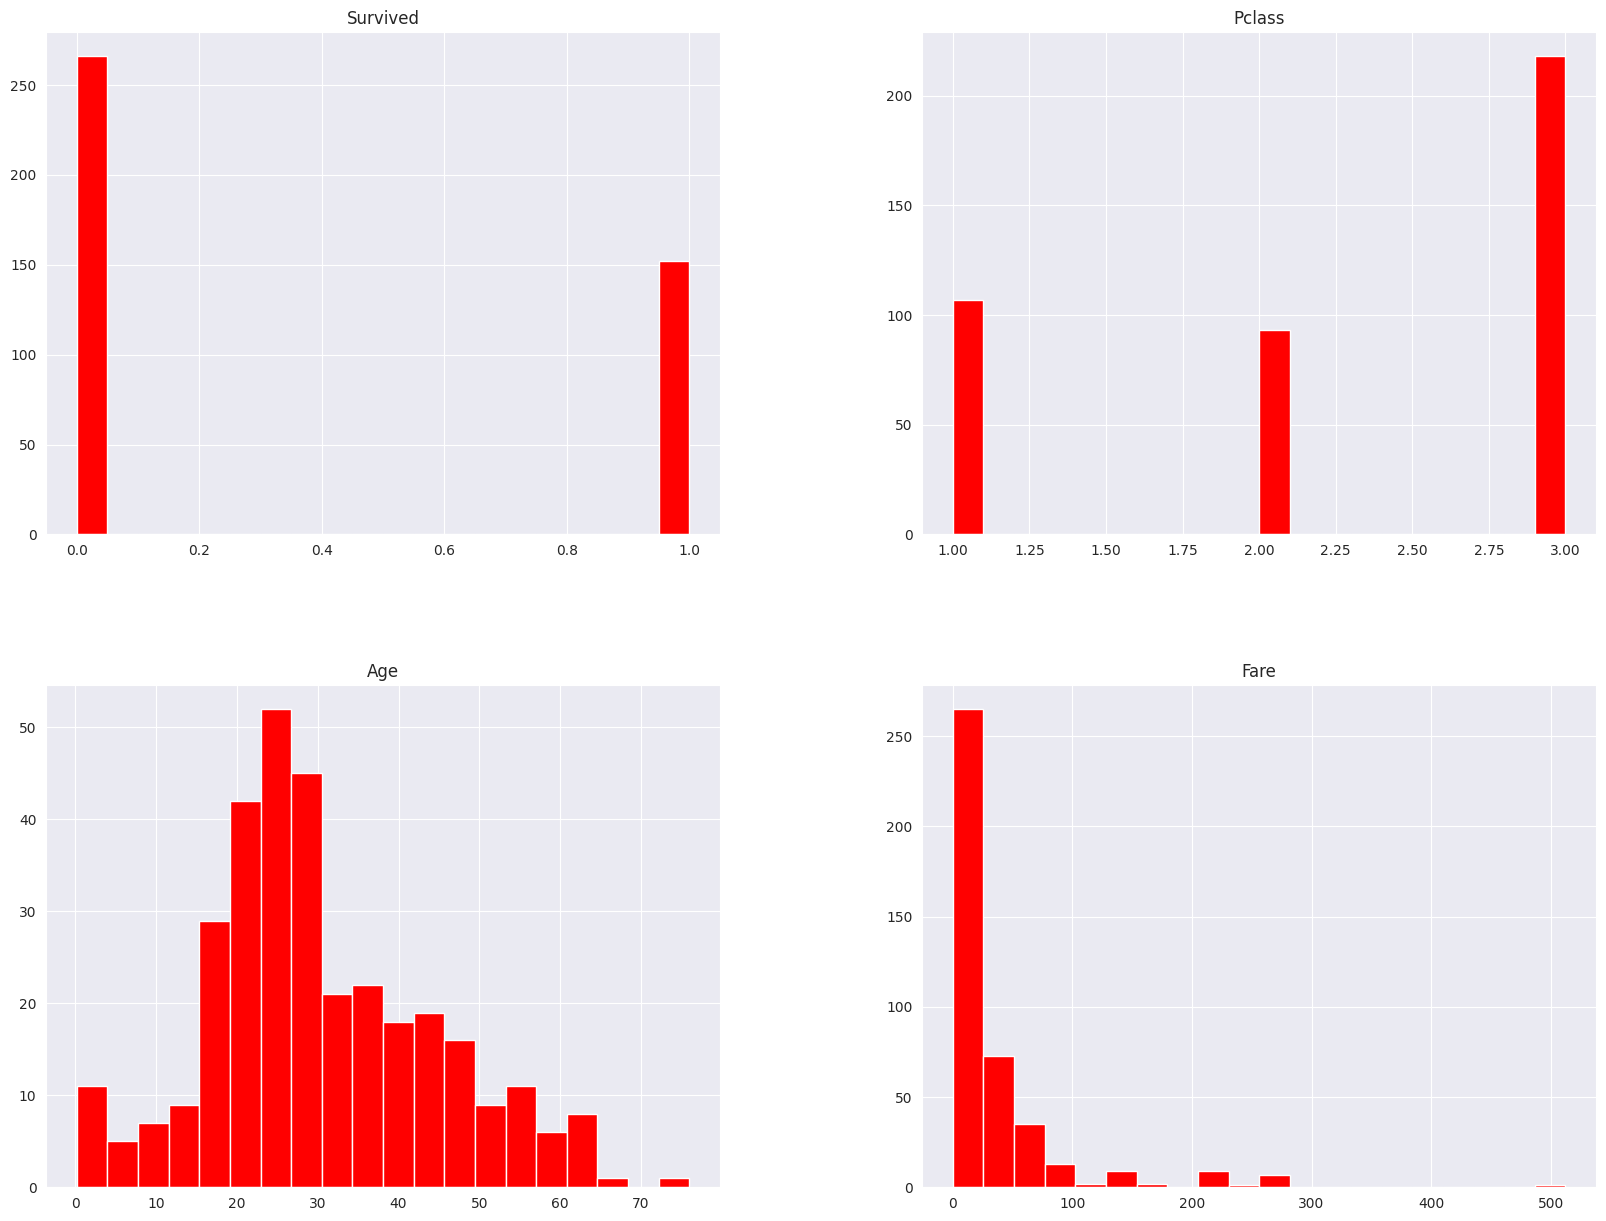

In [ ]:
data.hist(bins=20, figsize=(20, 15) , color = "red")
plt.show()

<Axes: title={'center': 'Age'}, xlabel='Sex'>

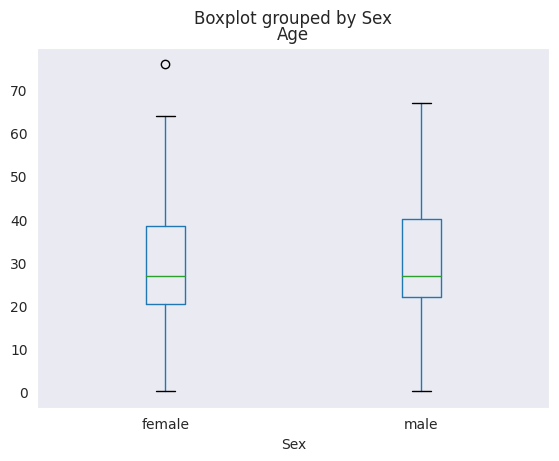

In [ ]:
sns.set_style("dark")
data.boxplot(by ='Sex', column =['Age'], grid = False)

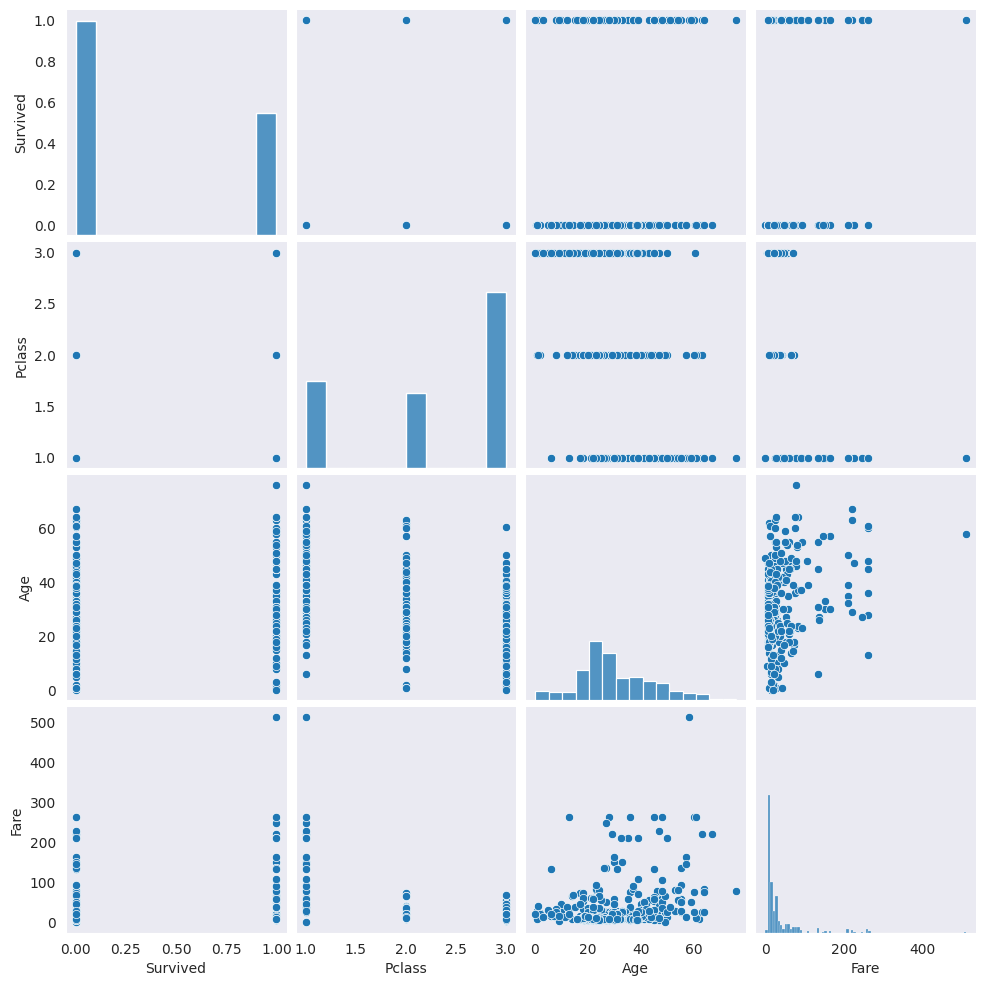

In [ ]:
sns.pairplot(data  )
plt.show()

CHECKING FOR 'NAN' VALUES IN THE DATAFRAME AS THESE 'NAN' REPRESENT NULL VALUES OR NONE WHICH AFFECT THE ACCURACY FOR PREDICTION.

In [ ]:
data.isna().sum()

Survived     0
Pclass       0
Sex          0
Age         86
Fare         1
dtype: int64

"Age" and "Fare" columns have NaN values.

Replacing NaN values in 'Age' column by their column mean

In [ ]:
data.Age = data.Age.fillna(data.Age.mean())
data.head(20)

,Survived,Pclass,Sex,Age,Fare
0,0,3,male,34.50000,7.8292
1,1,3,female,47.00000,7.0000
2,0,2,male,62.00000,9.6875
3,0,3,male,27.00000,8.6625
4,1,3,female,22.00000,12.2875
5,0,3,male,14.00000,9.2250
6,1,3,female,30.00000,7.6292
7,0,2,male,26.00000,29.0000
8,1,3,female,18.00000,7.2292
9,0,3,male,21.00000,24.1500


lets create dummy variables for column 'Sex'

In [ ]:
dummy_data = pd.get_dummies(data.Sex)
dummy_data.head(10)

,female,male
0,0,1
1,1,0
2,0,1
3,0,1
4,1,0
5,0,1
6,1,0
7,0,1
8,1,0
9,0,1


ADDING THE NEW COLUMN TO THE DATAFRAME

In [ ]:
data = pd.concat([data,dummy_data] , axis = "columns")
data

,Survived,Pclass,Sex,Age,Fare,female,male
0,0,3,male,34.50000,7.8292,0,1
1,1,3,female,47.00000,7.0000,1,0
2,0,2,male,62.00000,9.6875,0,1
3,0,3,male,27.00000,8.6625,0,1
4,1,3,female,22.00000,12.2875,1,0
...,...,...,...,...,...,...,...
413,0,3,male,30.27259,8.0500,0,1
414,1,1,female,39.00000,108.9000,1,0
415,0,3,male,38.50000,7.2500,0,1
416,0,3,male,30.27259,8.0500,0,1


DROPPING THE 'SEX' COLUMN FROM THE DATA FRAME

In [ ]:
data.drop(['Sex','Fare'] , axis = 1, inplace = True)
print(data)

     Survived  Pclass       Age  female  male
0           0       3  34.50000       0     1
1           1       3  47.00000       1     0
2           0       2  62.00000       0     1
3           0       3  27.00000       0     1
4           1       3  22.00000       1     0
..        ...     ...       ...     ...   ...
413         0       3  30.27259       0     1
414         1       1  39.00000       1     0
415         0       3  38.50000       0     1
416         0       3  30.27259       0     1
417         0       3  30.27259       0     1

[418 rows x 5 columns]


since we want to predict the survival of a person . let us define the dependent variables that is 'Survived'

In [ ]:
x = data[['Pclass','Age','female','male'] ]
y = data[['Survived']]

MODEL FITTING BY USING NAIVE BAYES ALGORITHM

SPLITTING THE DATA INTO TRAINING AND TESTING IN 7:3 RATION .

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3 , random_state = 1)

USING GAUSSIAN METHOD FOR MODEL FITTING

In [ ]:
gnb = GaussianNB()

In [ ]:
gnb.fit(x_test,y_test)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GaussianNB()

In [ ]:
y_pred = gnb.predict(x_test)
y_pred

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0])

In [ ]:
print('ACCURACY' ,metrics.accuracy_score(y_test,y_pred) )

ACCURACY 1.0



**CONCLUSION**


---

THEREFORE , THE ACCURACY OF THE MODEL IS 100%, THIS GAUSSIAN MODEL IS WELL FIT FOR THE SURVIVAL PREDICTION OF THE TITANIC PASSENGERS.



